##Cross-validation and Bootstrap

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#读取数据集
auto_df = pd.read_csv('data/Auto.csv', na_values = "?")
auto_df.dropna(inplace = True)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


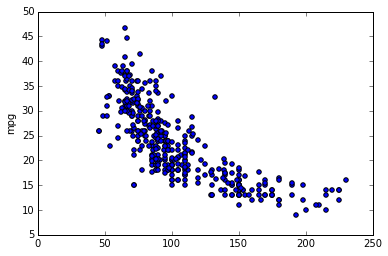

In [11]:
fig, ax = plt.subplots()
ax.scatter(x=auto_df['horsepower'],y=auto_df['mpg'])
ax.set_ylabel('mpg')

##Leave One Out Cross Validation(LOOCV)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import LeaveOneOut
from sklearn.metrics import mean_squared_error

In [4]:
clf = LinearRegression()
loo = LeaveOneOut(len(auto_df))
#loo提供了训练和测试的索引
X = auto_df[['horsepower']].values
y = auto_df['mpg'].values
n = np.shape(X)[0]
mses =[]
for train, test  in loo:
    Xtrain,ytrain,Xtest,ytest = X[train],y[train],X[test],y[test]
    clf.fit(Xtrain,ytrain)
    ypred = clf.predict(Xtest)
    mses.append(mean_squared_error(ytest,ypred))
np.mean(mses)

24.231513517929226

In [13]:
def loo_shortcut(X,y):
    clf = LinearRegression()
    clf.fit(X,y)
    ypred = clf.predict(X)
    xbar = np.mean(X,axis =0)
    xsum = np.sum(np.power(X-xbar,2))
    nrows = np.shape(X)[0]
    mses = []
    for row in range(0,nrows):
        hi = (1 / nrows) + (np.sum(X[row] - xbar) ** 2 / xsum)
        mse = ((y[row] - ypred[row])/(1-hi))**2
        mses.append(mse)
    return np.mean(mses)

loo_shortcut(auto_df[['horsepower']].values,auto_df['mpg'].values)

24.23151351792923

$$CV_{(n)} = \frac {1} {n} \sum_{i =1}^n (\frac{y_i - \hat y_i}{1- h_i})^2$$

$$ h_i = \frac {1}{h} + \frac{(x_i -  \bar x)^2}{\sum_{i'=1} ^n (x_i' - \bar x)^2 }$$

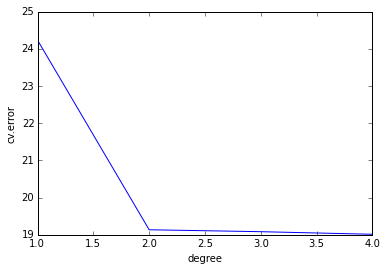

In [16]:
# LOOCV 应用于同一种模型不同复杂度的选择
auto_df['horsepower^2'] = auto_df['horsepower'] * auto_df['horsepower']
auto_df['horsepower^3'] = auto_df['horsepower^2'] * auto_df['horsepower']
auto_df['horsepower^4'] = auto_df['horsepower^3'] * auto_df['horsepower']
auto_df['horsepower^5'] = auto_df['horsepower^4'] * auto_df['horsepower']
auto_df['unit'] = 1
colnames = ["unit", "horsepower", "horsepower^2", "horsepower^3", "horsepower^4", "horsepower^5"]
cv_errors = []
for ncols in range(2,6):
    X = auto_df[colnames[0:ncols]]
    y = auto_df['mpg']
    clf = LinearRegression()
    clf.fit(X,y)
    cv_errors.append(loo_shortcut(X.values,y.values))
plt.plot(range(1,5),cv_errors)
plt.xlabel('degree')
plt.ylabel('cv.error')

##K-Fold Cross Validation

In [17]:
from sklearn.cross_validation import KFold

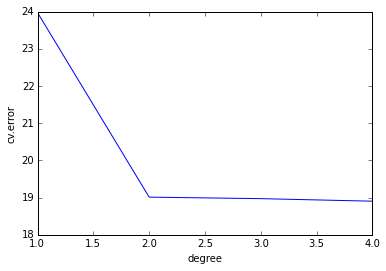

In [19]:
cv_errors = []
for ncols in range(2,6):
    X = auto_df[colnames[0:ncols]].values
    y = auto_df['mpg'].values
    kfold = KFold(len(auto_df),n_folds = 10)
    mses =[]
    for train,test in kfold:
        Xtrain,ytrain,Xtest,ytest = X[train],y[train],X[test],y[test]
        clf.fit(X,y)
        ypred = clf.predict(Xtest)
        mses.append(mean_squared_error(ypred,ytest))
    cv_errors.append(np.mean(mses))
plt.plot(range(1,5),cv_errors)
plt.xlabel("degree")
plt.ylabel('cv.error')

##Bootstrap

In [20]:
from sklearn.cross_validation import Bootstrap

C:\Program Files (x86)\WinPython-64bit-3.4.3.4\python-3.4.3.amd64\lib\site-packages\sklearn\cross_validation.py:688: DeprecationWarning: Bootstrap will no longer be supported as a cross-validation method as of version 0.15 and will be removed in 0.17
  "will be removed in 0.17", DeprecationWarning)
C:\Program Files (x86)\WinPython-64bit-3.4.3.4\python-3.4.3.amd64\lib\site-packages\sklearn\cross_validation.py:688: DeprecationWarning: Bootstrap will no longer be supported as a cross-validation method as of version 0.15 and will be removed in 0.17
  "will be removed in 0.17", DeprecationWarning)
C:\Program Files (x86)\WinPython-64bit-3.4.3.4\python-3.4.3.amd64\lib\site-packages\sklearn\cross_validation.py:688: DeprecationWarning: Bootstrap will no longer be supported as a cross-validation method as of version 0.15 and will be removed in 0.17
  "will be removed in 0.17", DeprecationWarning)
C:\Program Files (x86)\WinPython-64bit-3.4.3.4\python-3.4.3.amd64\lib\site-packages\sklearn\cross_va

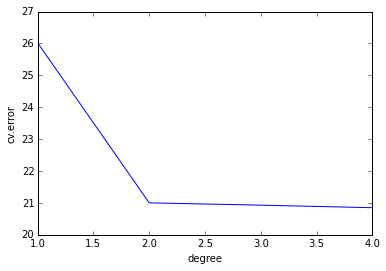

In [24]:
cv_errors = []
for ncols in range(2,6):
    X = auto_df[colnames[0:ncols]].values
    y = auto_df['mpg'].values
    n = len(auto_df)
    bs = Bootstrap(n,train_size=int(0.9*n),test_size=int(0.1*n),n_iter=10,random_state=0)
    mses = []
    for train,test in bs:
        Xtrain,ytrain,Xtest,ytest = X[train],y[train],X[test],y[test]
        clf = LinearRegression()
        clf.fit(X,y)
        ypred = clf.predict(Xtest)
        mses.append(mean_squared_error(ypred,ytest))
    cv_errors.append(np.mean(mses))
plt.plot(range(1,5),cv_errors)
plt.xlabel('degree')
plt.ylabel('cv.error')